In [0]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the Data

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.utils import np_utils


path="/content/drive/My Drive/deep/Copy of ytrain.npy"
path1="/content/drive/My Drive/deep/Copy of xtrain.npy"
y_train=np.load(path)
x_train=np.load(path1)
print(x_train.shape)
print(len(x_train))
print(y_train.shape)
print(len(y_train))





(298, 300, 300, 3)
298
(298,)
298


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(len(x_train),len(x_test))


208 90


# New Section

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf 
from tensorflow.keras import regularizers



model= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=x_train.shape[1:],padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
   # tf.keras.layers.BatchNormalization(),
    # The second convolution
     #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     #tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.BatchNormalization(),
    # # The third convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(.001)),
    tf.keras.layers.Dropout(0.7),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('defective') and 1 for the other ('non-defective')
    tf.keras.layers.Dense(2, activation='sigmoid')
])
    
    
  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               46080128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 46,080,834
Trainable params: 46,080,834
Non-trainable params: 0
__________________________________________

#Compile the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])




#Test the model

In [0]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)



Epoch 1/30
7/7 [==============================] - 10s 1s/step - loss: 9.4015 - accuracy: 0.5144 - val_loss: 1.3777 - val_accuracy: 0.6778
Epoch 2/30
7/7 [==============================] - 10s 1s/step - loss: 2.7116 - accuracy: 0.6346 - val_loss: 1.0659 - val_accuracy: 0.6889
Epoch 3/30
7/7 [==============================] - 10s 1s/step - loss: 1.2372 - accuracy: 0.6538 - val_loss: 1.1733 - val_accuracy: 0.7556
Epoch 4/30
7/7 [==============================] - 10s 1s/step - loss: 1.1548 - accuracy: 0.7067 - val_loss: 1.1848 - val_accuracy: 0.7556
Epoch 5/30
7/7 [==============================] - 10s 1s/step - loss: 1.1144 - accuracy: 0.7067 - val_loss: 1.1458 - val_accuracy: 0.8333
Epoch 6/30
7/7 [==============================] - 10s 1s/step - loss: 1.0965 - accuracy: 0.7356 - val_loss: 1.0807 - val_accuracy: 0.8333
Epoch 7/30
7/7 [==============================] - 10s 1s/step - loss: 1.0285 - accuracy: 0.7596 - val_loss: 1.0349 - val_accuracy: 0.8000
Epoch 8/30
7/7 [==================

In [0]:
test_acc=model.evaluate(x_test,y_test)
print('test accuracy:',test_acc[1]*100)

3/3 [==============================] - 1s 324ms/step - loss: 0.6298 - accuracy: 0.8667
test accuracy: 86.66666746139526


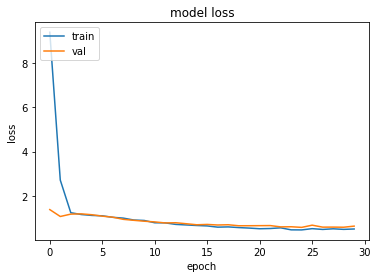

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


cm=confusion_matrix(y_test,y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
x=(TP/(TP+FN))
y=(TP/(TP+FP))
print('precision',y)
print('Recall',x)


precision 0.8958333333333334
Recall 0.86


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.88      0.83      0.85        42

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.87        90
weighted avg       0.87      0.87      0.87        90



#CALCULATE DEFECTIVE AND NON DEFECTIVE ACCURACY

In [0]:
cmat=confusion_matrix(y_test,y_pred)
x=cmat.diagonal()/cmat.sum(axis=1)
print('DEFECTIVE ACCURACY->',x[0]*100)
print('NON-DEFECTIVE ACCURACY->',x[1]*100)

DEFECTIVE ACCURACY-> 89.58333333333334
NON-DEFECTIVE ACCURACY-> 83.33333333333334
